Technology and tools wise this project covers,
1. Python
2. Numpy and Pandas for data cleaning
3. Matplotlib for data visualization
4. Sklearn for model building
5. Jupyter notebook, visual studio code and pycharm as IDE
6. Python flask for http server
7. HTML/CSS/Javascript for UI





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
l=[]
for i in df.columns:
  l.append(df[i].value_counts())

In [7]:
l

[Super built-up  Area    8790
 Built-up  Area          2418
 Plot  Area              2025
 Carpet  Area              87
 Name: area_type, dtype: int64, Ready To Move    10581
 18-Dec             307
 18-May             295
 18-Apr             271
 18-Aug             200
                  ...  
 16-Oct               1
 15-Dec               1
 16-Nov               1
 17-Jan               1
 16-Jan               1
 Name: availability, Length: 81, dtype: int64, Whitefield            540
 Sarjapur  Road        399
 Electronic City       302
 Kanakpura Road        273
 Thanisandra           234
                      ... 
 T G extension           1
 Chambenahalli           1
 K N Extension           1
 Hanuman Nagar           1
 Hsr layout sector3      1
 Name: location, Length: 1305, dtype: int64, 2 BHK         5199
 3 BHK         4310
 4 Bedroom      826
 4 BHK          591
 3 Bedroom      547
 1 BHK          538
 2 Bedroom      329
 5 Bedroom      297
 6 Bedroom      191
 1 Bedroom      10

In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.describe(include='O')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [10]:
#lets check the relationship of price wrt area_type

In [11]:
df[['area_type','price']].groupby(['area_type'],as_index=False).mean().sort_values(by='price',ascending=False)

,area_type,price
2,Plot Area,208.495486
0,Built-up Area,104.285498
3,Super built-up Area,92.971757
1,Carpet Area,89.502356


Here we can see that plot area seems to have an edge over the rest as compared to the others. 

In [12]:
df[['availability','price']].groupby(['availability'],as_index=False).mean().sort_values(by='price',ascending=False)

,availability,price
42,19-Jan,367.552051
58,20-May,323.500000
55,20-Jul,297.600000
6,15-Oct,280.500000
50,20-Apr,264.737500
...,...,...
71,21-Oct,48.000000
0,14-Jul,43.710000
1,14-Nov,43.710000
47,19-Nov,42.797143


Availability has a huge variance and doesnt seem very useful so lets drop this column.

In [13]:
df[['location','price']].groupby(['location'],as_index=False).mean().sort_values(by='price',ascending=False)

,location,price
351,Cubbon Road,1900.000000
145,Ashok Nagar,1486.000000
362,Defence Colony,1167.714286
1265,Yemlur,1093.388889
339,Church Street,1068.000000
...,...,...
298,Celebrity Paradise Layout,19.245000
162,BAGUR,17.000000
780,Makali,16.000000
0,Anekal,16.000000


Although we see that locations are large in number, we should consider it due to its major price difference. We can do so by grouping them into ranges

In [14]:
df[['size','price']].groupby(['size'],as_index=False).mean().sort_values(by='price',ascending=False)

,size,price
20,43 Bedroom,660.000000
4,10 Bedroom,561.250000
10,16 BHK,550.000000
12,19 BHK,490.000000
21,5 BHK,425.618644
25,7 BHK,389.294118
3,10 BHK,342.500000
7,12 Bedroom,300.000000
18,4 BHK,278.415220
8,13 BHK,275.000000


Size will definatly impace the price. so again we can convert it into appropriate ranges

In [15]:
df[['society','price']].groupby(['society'],as_index=False).mean().sort_values(by='price',ascending=False)

,society,price
1034,Kierser,2700.000000
652,Epllan,1915.000000
63,Adion A,1800.000000
1507,Phaku K,1500.000000
1109,LeeyaCa,1063.000000
...,...,...
2091,Shntie,13.500000
1936,Saaveha,12.750000
944,Jae 1hu,12.729167
2265,SrSaira,12.000000


Sociect has a large number of entries and also a huge price difference. we can add it

In [16]:
df[['total_sqft','price']].groupby(['total_sqft'],as_index=False).mean().sort_values(by='price',ascending=False)

,total_sqft,price
1893,7150,3600.00
1968,8321,2806.00
2042,9200,2600.00
1645,4350,2600.00
77,10624,2340.00
...,...,...
241,1200 - 1800,12.75
1589,395,10.25
1483,340,10.00
766,167Sq. Meter,10.00


again this has to be included


**Now that we finished looking at categorical variables lets understand the numeric ones**

In [17]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


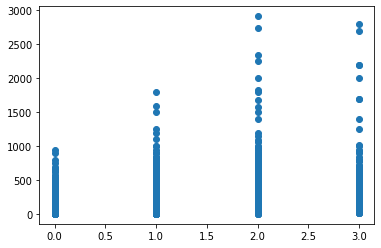

In [18]:
plt.scatter(df.balcony,df.price)
plt.show()

with respect to balcony we can see that there is hardly any difference . majority falls in the 0-1000 range apart from a few outliers
so drop it

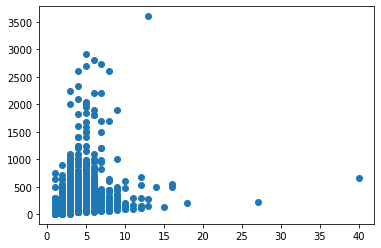

In [19]:
plt.scatter(df.bath,df.price)
plt.show()

we should add this column because the is alot of difference between no of baths wrt price

In [20]:
df.corr(method='pearson')

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


**Finally we decided to drop the following cols:**


1.   society
2.   availability
3.   balcony




In [21]:
df2=df.drop(['society','availability','balcony'],axis='columns')

In [22]:
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


**Lets look for null values now**

In [23]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Now you have two options here:


1.   drop the na rows because we have 13k rows and 73 is insignificant
2.   fill the missing entries with mean ,median,interpolate ...etc



**Well.. Im droping them**

In [24]:
df3=df2.dropna()

In [25]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Now lets go further into data exploration

In [26]:
df3.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

**SIZE COLUMN**

In [27]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Did you notice the unclean data and multiple redundancies?
lets clean it by goruping the relevant ones together

In [28]:
df3['bhk']=df3['size'].apply(lambda x: x.split(' ')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [30]:
df3['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

lets look at total_sqft

In [31]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [32]:
#we seem to have a range here. lets replace with mean.

In [33]:
def not_range(x):
  try:
    float(x)
  except:
    return False
  return True   

create a dataframe which passes on each value of total sqft and returns true if it is a range

In [34]:
df3[~df3['total_sqft'].apply(not_range)]

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [35]:
def convert_range(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return(float(float(tokens[0])+float(tokens[1])))/2
  try:
    return float(x)
  except:
    return None      


In [36]:
df4=df3.copy()

In [37]:
df4['total_sqft']=df4['total_sqft'].apply(convert_range)
df4.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [38]:
df4.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [39]:
df4=df4.dropna()

In [40]:
#feature engineering:
df5=df4.copy()
df5['price_per_sqft']=df['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
#lets work on locations

In [42]:
len(df5['location'].unique())

1298

In [43]:
#lets strip extra spaces from loaction and the group similar priced locs

In [44]:
df5.location=df5.location.apply(lambda x: x.strip())

In [45]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [46]:
#alot of ones..so lets group all locs with less than 10 and call it other location
location_stats_less_than_10=location_stats[location_stats<10]
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [47]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Ganga Nagar', 'HSR Layout',
       'Doddathoguru', 'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Bommanahalli', 'Gunjur',
       'Devarachikkanahalli', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',


In [48]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
other                    2732
Whitefield                533
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            264
                         ... 
Dodsworth Layout           10
BTM 1st Stage              10
Dairy Circle               10
1st Block Koramangala      10
Nagappa Reddy Layout       10
Name: location, Length: 255, dtype: int64

Now lets look at outliers and try and remove any

In [49]:
df5.head(10)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Upon research a standard room has around 300sq ft per room.
so lets check unusual instances


In [50]:
df5.bhk=df5.bhk.apply(lambda x: float(x))

In [51]:
df5[df5.total_sqft/df5.bhk<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7.0,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6.0,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5.0,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5.0,9043.927649


In [52]:
df6=df5[df5.total_sqft/df5.bhk<300]
df6.shape

(744, 8)

remove these

In [53]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [54]:
df6.shape

(12456, 8)

lets check price per squarefeet

In [55]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

This is definitly a outlier

we remove ppsqft where the result lies within the ranges:
greater than mean-sd and less than mean+std within each location type

In [56]:
def remove_outs(df):
  new_df=pd.DataFrame()
  for k,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft) 
    rdf=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    new_df=pd.concat([new_df,rdf],ignore_index=True)
  return new_df
df7=remove_outs(df6)    

In [57]:
df7

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3.0,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...,...,...
10217,Super built-up Area,other,2 BHK,1353.0,2.0,110.00,2.0,8130.081301
10218,Plot Area,other,1 Bedroom,812.0,1.0,26.00,1.0,3201.970443
10219,Super built-up Area,other,3 BHK,1440.0,2.0,63.93,3.0,4439.583333
10220,Super built-up Area,other,2 BHK,1075.0,2.0,48.00,2.0,4465.116279


In [58]:
def remove_bhk_outliers(df):
  exclude_indies=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft)
          ,'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)  
      if stats and stats['count']>5:
        exclude_indies=np.append(exclude_indies,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indies,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape          

(7369, 8)

In [59]:
#now batrooms
df8.bath.unique

<bound method Series.unique of 0        4.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
10213    2.0
10214    1.0
10217    2.0
10218    1.0
10221    5.0
Name: bath, Length: 7369, dtype: float64>

In [60]:
#how can baths be greater thanm bhk?


In [61]:
df8=df8[df8.bath<df8.bhk+2]

In [62]:
df8.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.805668


In [63]:
df9=df8.copy()

In [64]:
#area_type
df9['area_type']=df9['area_type'].replace({'Super built-up  Area':1,'Plot  Area':2,'Built-up  Area':3,'Carpet  Area':4})

In [65]:
df9.drop(['size','price_per_sqft'],axis='columns',inplace=True)

In [66]:
df9

,area_type,location,total_sqft,bath,price,bhk
0,1,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...,...
10213,4,other,1200.0,2.0,70.0,2.0
10214,1,other,1800.0,1.0,200.0,1.0
10217,1,other,1353.0,2.0,110.0,2.0
10218,2,other,812.0,1.0,26.0,1.0


In [67]:
dummies=pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,...,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df9

,area_type,location,total_sqft,bath,price,bhk
0,1,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...,...
10213,4,other,1200.0,2.0,70.0,2.0
10214,1,other,1800.0,1.0,200.0,1.0
10217,1,other,1353.0,2.0,110.0,2.0
10218,2,other,812.0,1.0,26.0,1.0


In [69]:
df10=pd.concat([df9,dummies.drop('Anekal',axis='columns')],axis='columns')
df10

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,...,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,4,other,1200.0,2.0,70.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10214,1,other,1800.0,1.0,200.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10217,1,other,1353.0,2.0,110.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10218,2,other,812.0,1.0,26.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
df10=df10.drop('location',axis='columns')

In [71]:
df10

,area_type,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,4,1200.0,2.0,70.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10214,1,1800.0,1.0,200.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10217,1,1353.0,2.0,110.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10218,2,812.0,1.0,26.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
X=df10.drop('price',axis='columns')
X

,area_type,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 1st Stage,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 1 HSR Layout,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,2850.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1630.0,3.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1235.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,4,1200.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10214,1,1800.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10217,1,1353.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10218,2,812.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
y=df10.price

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [75]:
model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8556886211552566

In [76]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=1000,tol=0.1)
lasso_reg.fit(xtrain,ytrain)
lasso_reg.score(xtest,ytest)

0.6932388312798722

In [77]:
from sklearn import linear_model
ridge_reg=linear_model.Ridge(alpha=50,max_iter=1000,tol=0.1)
ridge_reg.fit(xtrain,ytrain)
ridge_reg.score(xtest,ytest)

0.7721711986952916

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
model_params={
    'linear':{
        'model':LinearRegression(),
            'params': {
            'normalize':[True,False]
              }
           },
           'lasso':{
        'model':linear_model.Lasso(),
            'params':{
            'alpha':[1,2],
            'selection':['random','cyclic']
           
                  }
           },
          'dec_tree':{
        'model':DecisionTreeRegressor(),
            'params':{
            'criterion':['mse','friedman_mse'],
            'splitter':['best', 'random'], 
            'C': [1,5,10]
                  }
            }
           
}


scores=[]
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=cv)
  clf.fit(xtrain,ytrain)
  scores.append({'model':model_name,'best_score':clf.best_score_,'best_params':clf.best_params_})
  

scores


In [79]:
#linear regression Wins
model=LinearRegression(normalize= False)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8556886211552566

In [80]:
X.columns

Index(['area_type', 'total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=258)

In [81]:
#prediction function
def predict(area,loc,sqft,bath,bhk):
  loc_index=np.where(X.columns==loc)[0][0]
  ar={'Super built-up  Area':1,'Plot  Area':2,'Built-up  Area':3,'Carpet  Area':4}

  x=np.zeros(len(X.columns))
  x[0]=ar[area]
  x[1]=sqft
  x[2]=bath
  x[3]=bhk
  if loc_index>=0:
    x[loc_index]=1
  return model.predict([x])[0]     

In [82]:
predict('Super built-up  Area','1st Phase JP Nagar',1000,2,2)

86.80499094611169

In [83]:
predict('Super built-up  Area','Whitefield',1000,3,3)

54.175849105220834

In [84]:
import pickle
pickle.dump(model,open('BangloreHousePrice.pickle','wb'))

In [85]:
load=pickle.load(open('BangloreHousePrice.pickle','rb'))

In [ ]:
load.score(xtest,ytest)

In [ ]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
json.dumps(columns)